# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in columns 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [2]:
import pandas as pd

df = pd.read_csv('data/Bryant et al 2010.csv')
df.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [3]:
# Define experiments and outcomes
x = df.iloc[:,2:11]
y = df.iloc[:,15] # These are integer-binary and simply greater than 90%

x.head()

,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000


In [4]:
# This doesn't actually seem necessary anymore
# # Convert to numpy format, since workbench is not entirely compatible with pandas
# x = x.to_records()
# y = y.values

## PRIM Analysis

In [36]:
from ema_workbench.analysis import prim # Throws error
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/lib/python3.7/site-packages/ema_workbench/analysis/prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [6]:
prim_alg = prim.Prim(x, y, threshold = 0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


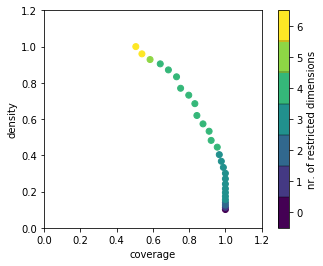

In [7]:
import matplotlib.pyplot as plt

box1.show_tradeoff()
plt.show()

coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



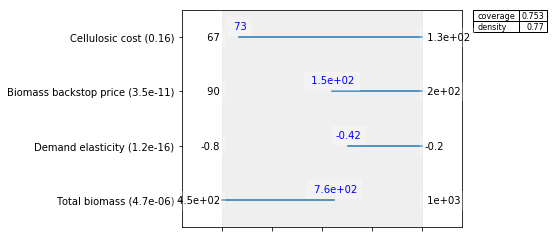

In [8]:
box1.inspect(21)
box1.inspect(21, style = 'graph')
plt.show()

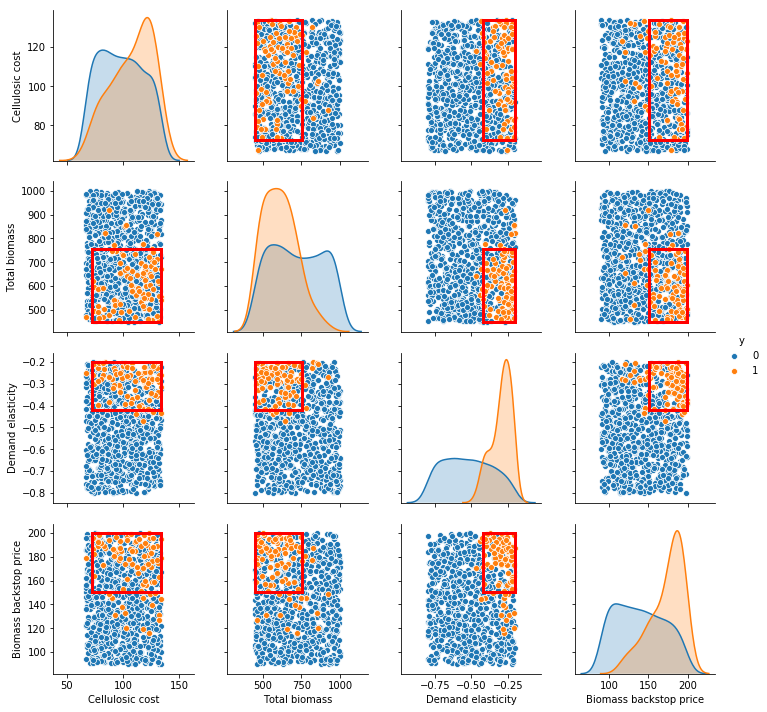

In [9]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

In [10]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 795 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3469387755102041, returning dump box


No additional boxes can be found where it fits over 0.8 of the points.

In [11]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density      mass  res_dim
box 1  0.752809  0.770115  0.098639        4
box 2  0.247191  0.027673  0.901361        0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997


## CART Analysis

In [12]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x, y, 0.05)
cart_alg.build_tree()

In [13]:
print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

       coverage   density      mass  res dim
box 1  0.011236  0.021739  0.052154        2
box 2  0.000000  0.000000  0.546485        2
box 3  0.000000  0.000000  0.103175        2
box 4  0.044944  0.090909  0.049887        2
box 5  0.224719  0.434783  0.052154        2
box 6  0.112360  0.227273  0.049887        3
box 7  0.000000  0.000000  0.051020        3
box 8  0.606742  0.642857  0.095238        2
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand

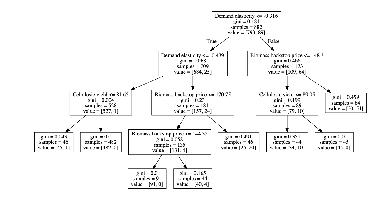

In [14]:
cart_alg.show_tree(True, format = 'png')
plt.show()
# Is there any way to change the resolution on this?

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [15]:
df = pd.read_csv('data/Rozenberg et al 2014.csv')
df.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [16]:
# Define experiments and outcomes

x = df.iloc[:,0:7] # Select experiment inputs
y = df.iloc[:,7:12] # These are integer-binary

In [17]:
# Choose the scenario to analyze here
prim_alg_SSP1 = prim.Prim(x, y['SSP1'], threshold = 0.8, peel_alpha = 0.1)
prim_alg_SSP2 = prim.Prim(x, y['SSP2'], threshold = 0.55, peel_alpha = 0.1)
prim_alg_SSP3 = prim.Prim(x, y['SSP3'], threshold = 0.8, peel_alpha = 0.1)
prim_alg_SSP4 = prim.Prim(x, y['SSP4'], threshold = 0.8, peel_alpha = 0.1)
prim_alg_SSP5 = prim.Prim(x, y['SSP5'], threshold = 0.45, peel_alpha = 0.1)

box_SSP1 = prim_alg_SSP1.find_box()
box_SSP2 = prim_alg_SSP2.find_box()
box_SSP3 = prim_alg_SSP3.find_box()
box_SSP4 = prim_alg_SSP4.find_box()
box_SSP5 = prim_alg_SSP5.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, d

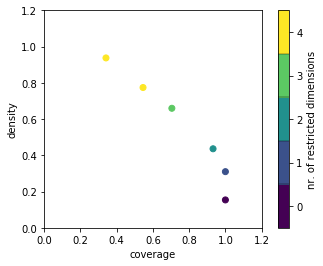

In [18]:
box_SSP1.show_tradeoff()
plt.show()

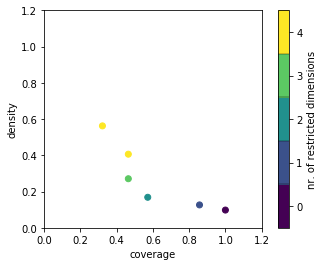

In [19]:
box_SSP2.show_tradeoff()
plt.show()

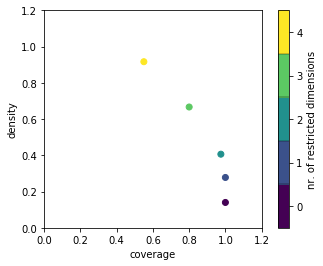

In [20]:
box_SSP3.show_tradeoff()
plt.show()

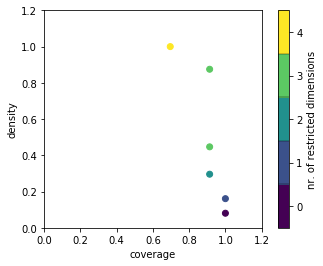

In [21]:
box_SSP4.show_tradeoff()
plt.show()

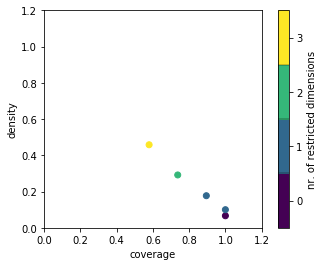

In [22]:
box_SSP5.show_tradeoff()
plt.show()

coverage         0.55
density      0.916667
id                  4
mass        0.0839161
mean         0.916667
res_dim             4
Name: 4, dtype: object

             box 4                                    
               min  max                      qp values
behaviors      0.0  0.0  [-1.0, 4.708610254878667e-06]
inequalities   0.0  0.0  [-1.0, 0.0007563634621240565]
technologies   0.0  0.0   [-1.0, 0.004871061749211022]
population     1.0  2.0  [0.0021975761425310184, -1.0]



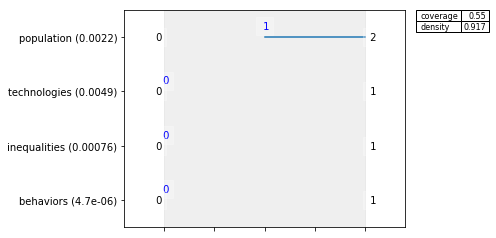

In [23]:
box_SSP3.inspect(4)
box_SSP3.inspect(4, style = 'graph')
plt.show()

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


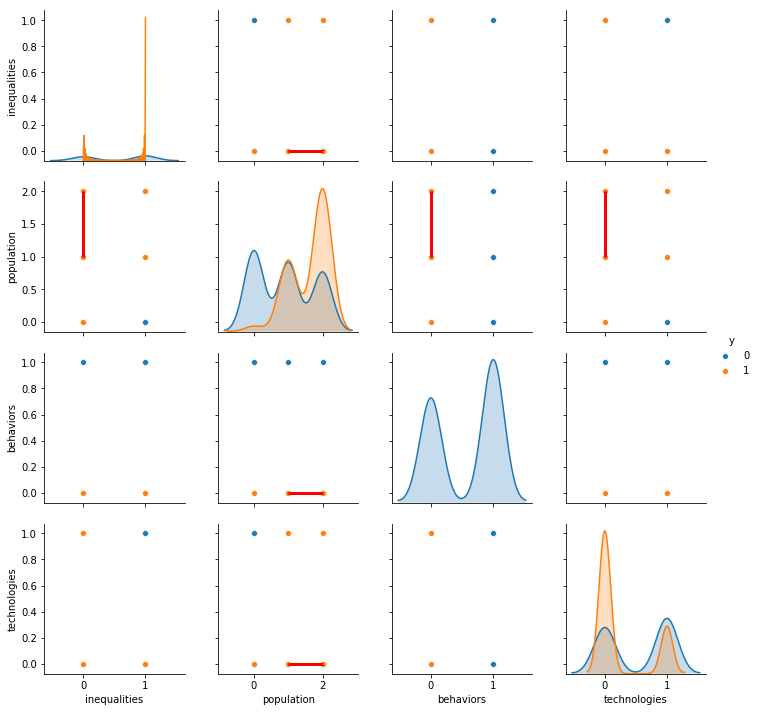

In [24]:
box_SSP3.select(4)
fig = box_SSP3.show_pairs_scatter()
plt.show()

In [25]:
box_SSP3_2 = prim_alg.find_box()

[MainProcess/INFO] no data remaining


In [26]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density      mass  res_dim
box 1  0.752809  0.770115  0.098639        4
box 2  0.247191  0.027673  0.901361        0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997


No additional SSP3 boxes found.

# Hamarat et al

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [32]:
from ema_workbench import load_results

dfHamarat = load_results('data/Hamarat et al 2013.gz')

In [33]:
# Define experiments and outcomes

x = dfHamarat[0].iloc[:,:45] # Select experiment inputs

In [75]:
# The results are 5000 rows of time series arrays

y = dfHamarat[1]['fraction renewables'][:,-1] < dfHamarat[1]['fraction renewables'][:,0]

[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.7121771217712177, mass: 0.0542, coverage: 0.22158438576349024, density: 0.7121771217712177 restricted_dimensions: 10


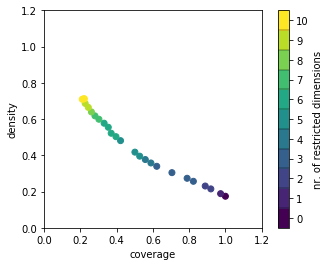

In [77]:
prim_alg = prim.Prim(x, y, threshold = 0.7, peel_alpha = 0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

In [78]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.174200,0,1.0000,0.174200,0
1,0.973594,0.188444,1,0.9000,0.188444,1
2,0.919633,0.214688,2,0.7462,0.214688,2
3,0.888634,0.230563,3,0.6714,0.230563,2
4,0.823192,0.256621,4,0.5588,0.256621,3
5,0.788749,0.273270,5,0.5028,0.273270,3
6,0.704937,0.304412,6,0.4034,0.304412,3
7,0.621125,0.339398,7,0.3188,0.339398,3
8,0.588978,0.357741,8,0.2868,0.357741,4
9,0.557979,0.376744,9,0.2580,0.376744,4


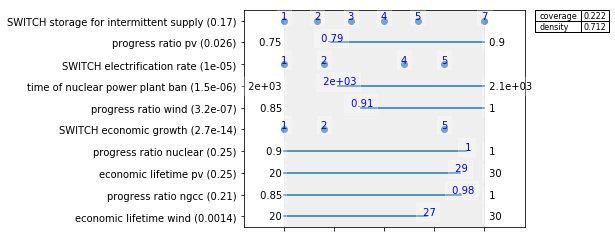

In [79]:
box1.inspect(style = 'graph')
plt.show()

coverage    0.221584
density     0.712177
id                24
mass          0.0542
mean        0.712177
res_dim           10
Name: 24, dtype: object

                                                    box 24  \
                                                       min   
economic lifetime wind                             20.0009   
progress ratio ngcc                               0.850016   
economic lifetime pv                               20.0002   
progress ratio nuclear                            0.900023   
SWITCH economic growth                           {1, 2, 5}   
progress ratio wind                               0.907457   
time of nuclear power plant ban                    2036.61   
SWITCH electrification rate                   {1, 2, 4, 5}   
progress ratio pv                                 0.785361   
SWITCH storage for intermittent supply  {1, 2, 3, 4, 5, 7}   

                                                            \
                                          

KeyError: 'time of nuclear power plant ban'

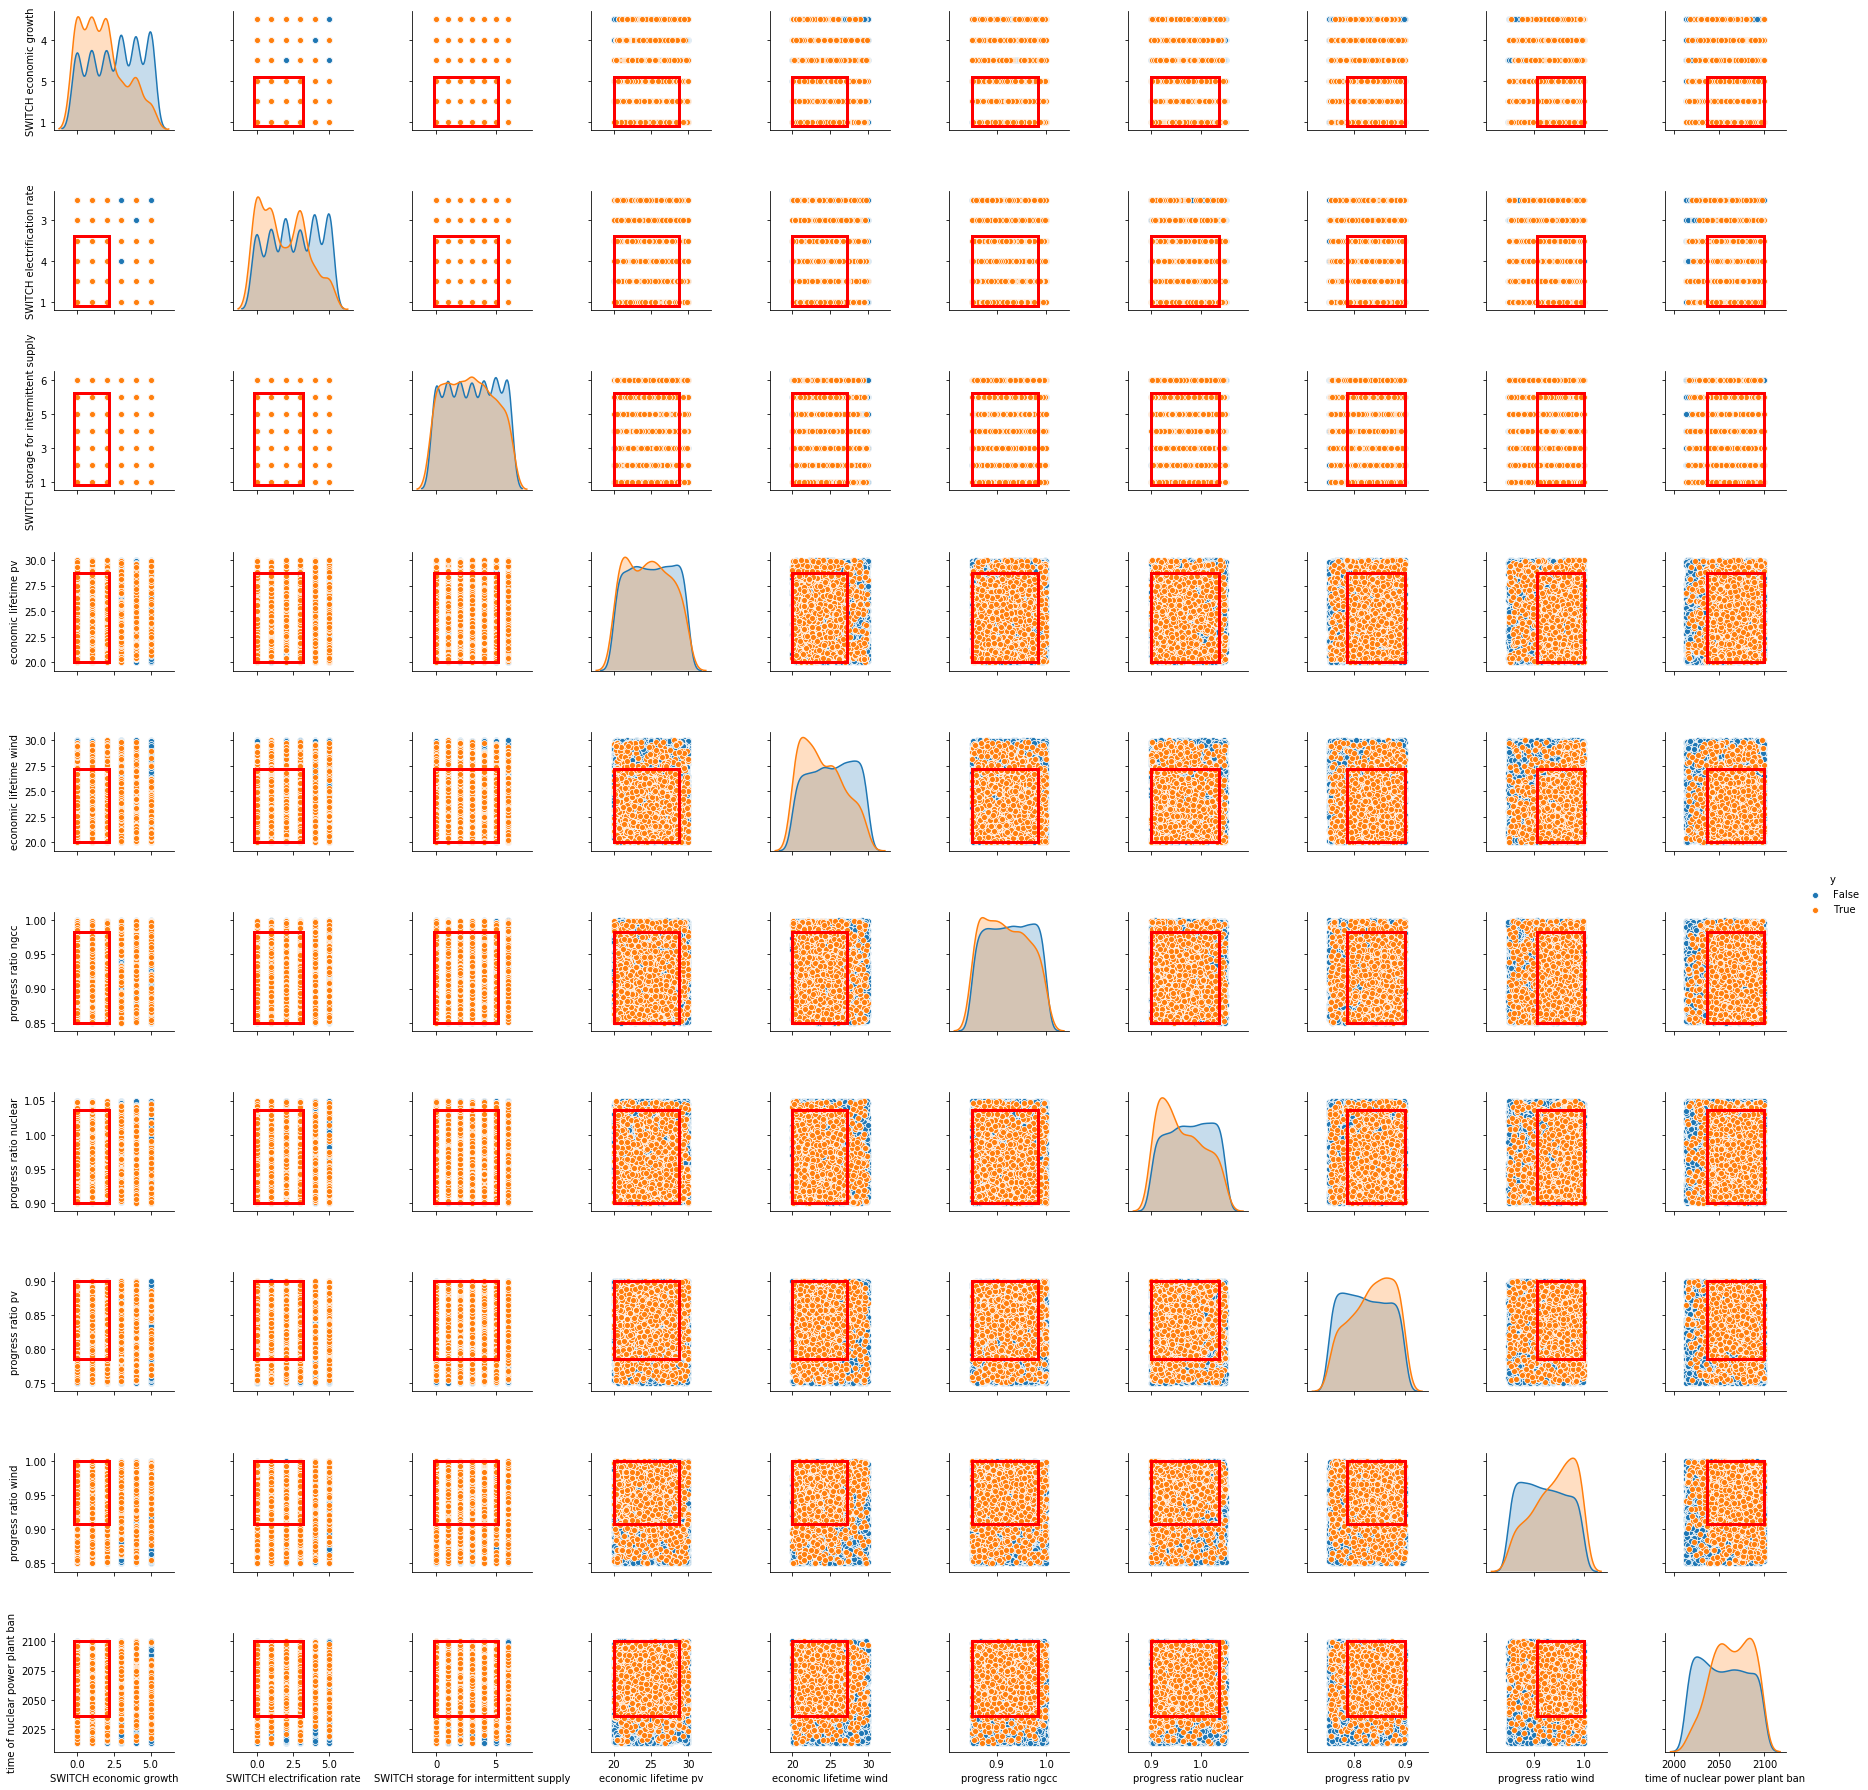

In [80]:
box1.inspect()
fig = box1.show_pairs_scatter()

In [57]:
dfHamarat[0].columns

Index(['SWITCH Market price determination', 'SWITCH TGC obligation curve',
       'SWITCH carbon cap', 'SWITCH carbon price determination',
       'SWITCH economic growth', 'SWITCH electrification rate',
       'SWITCH interconnection capacity expansion', 'SWITCH lookup curve TGC',
       'SWITCH low reserve margin price markup', 'SWITCH physical limits',
       'SWITCH storage for intermittent supply',
       'SWTICH preference carbon curve', 'demand fuel price elasticity factor',
       'economic lifetime biomass', 'economic lifetime coal',
       'economic lifetime gas', 'economic lifetime hydro',
       'economic lifetime igcc', 'economic lifetime ngcc',
       'economic lifetime nuclear', 'economic lifetime pv',
       'economic lifetime wind', 'investment proportionality constant',
       'investors desired excess capacity investment',
       'maximum battery storage uncertainty constant',
       'maximum no storage penetration rate pv',
       'maximum no storage penetration rat